In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
with open("processed_decomposed_dataset.jsonl", "r") as f:
    data_txt = [json.loads(x[:-2]) for x in f.readlines()]

In [3]:
data_txt[4]

{'query': 'I have a project where we deploy the "Vertex AI Vision SDK" into a container in Docker Desktop on the client computer on the edge and the sdk pushes the camera feed from the rtsp to Google Cloud\'s Vertex AI Vision and it goes through pre-trained human/vehicle model to find out count and that information is written into BigQuery in json format. This information will be queried and provided back to the customer in json response. \n\nI would like to identify the roundtrip time from the start of the stream to the json response. However the timestamp on the camera is off. It\'s hard to evaluate the roundtrip time. \n\nProvide me methodologies/ideas on how to accurately calculate the roundtrip time.',
 'output_a': 'To accurately calculate the roundtrip time for your Vertex AI Vision SDK container deployment, you can use the following methodologies:\n\n1. Add a timestamp to the camera feed: You can add a timestamp to the camera feed that is sent to Vertex AI Vision. This will allo

In [4]:
data_df = pd.DataFrame(data_txt)

In [5]:
data_df

,query,output_a,M_a_text,T_a_text,A_a_text,M_a_span,T_a_span,A_a_span,S_a,output_b,M_b_text,T_b_text,A_b_text,M_b_span,T_b_span,A_b_span,S_b,label
0,Define Signal Discuss its various properties w...,A signal is a form of energy that is used to t...,"Begins by interpreting the user's request, pro...",Transitions into a structured breakdown of sig...,A signal is a form of energy that is used to t...,"[0, 27]","[28, 102]","[0, 121]",Define and List Core Properties,A signal is a message that is conveyed from a ...,"Opens by interpreting the user's intent, defin...",Implements a systematic approach by listing an...,A signal is a message that is conveyed from a ...,"[0, 38]","[39, 180]","[0, 205]",Comprehensive List with Examples and Diagram R...,1
1,Please make a list of independent Fertility co...,"Sure, here are some independent Fertility coac...",Signals intent to fulfill the user's request a...,Implements the plan by presenting a numbered l...,1. Fertility Authority\n2. Fertility Solutions...,"[0, 18]","[19, 70]","[19, 70]",List Format with Placeholder Filling,"Sure, here is a list of independent Fertility ...",Acknowledges the request and frames the respon...,Executes by providing a numbered list of plaus...,1. Fertility Focus LLC\n2. Fertility Journey I...,"[0, 20]","[21, 99]","[21, 99]",List with Caveat and User Guidance,3
2,Explain various data mining functionalities wi...,Data mining is a process of discovering patter...,"Begins by interpreting the user's request, def...","Transitions into a structured list, systematic...",These are just a few examples of the many diff...,"[0, 27]","[28, 169]","[170, 239]","Define, List, and Exemplify",Data mining is the process of discovering patt...,Opens with a concise definition of data mining...,"Implements a detailed, itemized approach: for ...",These are just a few examples of the many data...,"[0, 20]","[21, 210]","[211, 282]","Define, Enumerate, and Contextualize",1
3,How do I change the short cut on mac osx to to...,To change the shortcut on Mac OS X to toggle t...,"Sets up a clear instructional intent, restatin...","Implements a detailed, sequential procedure wi...",That's it! Now you can use the key combination...,"[0, 18]","[19, 143]","[144, 159]",Stepwise Procedural Guide,To change the shortcut for toggling VoiceOver ...,Restates the user's goal and frames the respon...,"Presents a concise, ordered list of steps, inc...",Note: The default shortcut to toggle VoiceOver...,"[0, 16]","[17, 120]","[121, 135]",Concise Step List with Default Reference,0
4,"I have a project where we deploy the ""Vertex A...",To accurately calculate the roundtrip time for...,Restates the user's goal and frames the respon...,Organizes the answer as a numbered list of dis...,"By using one or more of these methodologies, y...","[0, 19]","[20, 120]","[121, 143]",List of Methods with Summary Conclusion,Here are some methodologies and ideas to accur...,Introduces the response as a direct answer to ...,"Presents a detailed, numbered list of methodol...","By implementing these methodologies, you can a...","[0, 18]","[19, 188]","[189, 211]",Comprehensive Tool-Based Method List,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,Can you share with me some good papers about h...,Sure! Here are some good papers that explore d...,The model acknowledges the request and frames ...,Implements the plan by systematically listing ...,"""Sequence to Sequence Learning with Neural Net...","[0, 19]","[20, 434]","[435, 510]",Curated List with Summaries,"Sure, here are some good papers about how larg...",The model acknowledges the request and sets up...,Executes the plan by numbering and briefly des...,These papers provide a good overview of the di...,"[0, 17]","[18, 206]","[207, 286]",Numbered List with Synthesis,2
683,"From last time:\n\nIn this conversation, we di...",Here are some potential use cases for large la...,Begins by directly addressing the user's reque...,"Implements a structured, e

In [6]:
data_df['label'].value_counts()

label
 0    179
 1    138
 2     95
-1     92
-2     81
-3     57
 3     45
Name: count, dtype: int64

In [7]:
def MTA_span_analysis(row):
    out_a = row['output_a']
    len_a = len(out_a.split(" "))
    out_b = row['output_b']
    len_b = len(out_b.split(" "))

    M_a_start, M_a_end = row['M_a_span'] if len(row['M_a_span']) == 2 else (0, 0)
    T_a_start, T_a_end = row['T_a_span'] if len(row['T_a_span']) == 2 else (0, 0)
    A_a_start, A_a_end = row['A_a_span'] if len(row['A_a_span']) == 2 else (0, 0)

    M_b_start, M_b_end = row['M_b_span'] if len(row['M_b_span']) == 2 else (0, 0)
    T_b_start, T_b_end = row['T_b_span'] if len(row['T_b_span']) == 2 else (0, 0)
    A_b_start, A_b_end = row['A_b_span'] if len(row['A_b_span']) == 2 else (0, 0)

    row['len_a'] = len_a
    row['len_b'] = len_b

    row['start_M_a'] = M_a_start / len_a
    row['end_M_a'] = M_a_end / len_a

    row['start_T_a'] = T_a_start / len_a
    row['end_T_a'] = T_a_end / len_a

    row['start_A_a'] = A_a_start / len_a
    row['end_A_a'] = A_a_end / len_a

    row['start_M_b'] = M_b_start / len_b
    row['end_M_b'] = M_b_end / len_b

    row['start_T_b'] = T_b_start / len_b
    row['end_T_b'] = T_b_end / len_b

    row['start_A_b'] = A_b_start / len_b
    row['end_A_b'] = A_b_end / len_b
    return row


In [8]:
new_df = data_df.apply(MTA_span_analysis, axis=1)

In [9]:
new_df["len_a"].mean(), new_df["len_b"].mean()

(230.14556040756915, 250.93740902474528)

In [10]:
new_df['start_A_a'].mean(), new_df['end_A_a'].mean(), new_df['start_A_b'].mean(), new_df['end_A_b'].mean()

(0.44148854150422034,
 0.7074224596497665,
 0.4676706277418472,
 0.7199317267469034)

In [11]:
new_df['start_M_a'].mean(), new_df['end_M_a'].mean(), new_df['start_M_b'].mean(), new_df['end_M_b'].mean()

(0.00016504455070229094,
 0.1260545513610709,
 0.0010028138588342188,
 0.1402898998599844)

In [12]:
new_df['start_T_a'].mean(), new_df['end_T_a'].mean(), new_df['start_T_b'].mean(), new_df['end_T_b'].mean()

(0.11953193877501457,
 0.6140441271894472,
 0.1327560256788435,
 0.6383919166876099)

In [20]:
S = pd.Series(list(new_df['S_a']) + list(new_df['S_b']))
M = pd.Series(list(new_df['M_a_text']) + list(new_df['M_b_text']))
T = pd.Series(list(new_df['T_a_text']) + list(new_df['T_b_text']))

In [21]:
S.value_counts()

Stepwise Instructional Guide                     8
Enumerate and Advise                             7
Enumerate and Explain                            5
Stepwise Procedural Guide                        5
Direct List Generation                           4
                                                ..
Contrast and Defer to Preference                 1
Single Best Recommendation with Justification    1
Structured Overview with Thematic Detailing      1
Structured Sectioned Documentation               1
Integrated Single-Sentence Summary               1
Name: count, Length: 1316, dtype: int64

In [22]:
M.value_counts()

Not explicitly present                                                                                                                                                                                                                           29
Expresses uncertainty about the user's intent and requests clarification before proceeding.                                                                                                                                                       2
Introduces the document as a project charter and immediately outlines a structured, numbered approach, signaling intent to systematically cover all key charter elements.                                                                         1
Establishes persona, intent, and approach: introduces self as Adelaide Marwick, affirms willingness to share genuine thoughts, and explicitly rejects any AI or software identity, setting up an authentic, personal, and expert perspective.     1
Begins directly with cha

In [23]:
T.value_counts()

Not explicitly present                                                                                                                                                                                                                                                                     16
Asks a clarifying question to gather more information before proceeding.                                                                                                                                                                                                                    2
Transitions into a structured breakdown of signal properties, listing and defining amplitude, frequency, and phase, and then explains how a diagram (waveform) can represent these properties.                                                                                              1
Organizes the response by segmenting each requested attribute (name, appearance, date, characteristics, kinks) with clear headings and elabora

In [24]:
M = M[M!="Not explicitly present"]
T = T[T!="Not explicitly present"]

In [25]:
M.isna().sum(), T.isna().sum()

(0, 0)

In [27]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')  # strong general-purpose model

embeddings_M = model.encode(list(M), normalize_embeddings=True)
embeddings_T = model.encode(list(T), normalize_embeddings=True)

c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [41]:
import hdbscan
clustererM = hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True)
clustererT = hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True)
labels_m = clustererM.fit_predict(embeddings_M)
labels_t = clustererT.fit_predict(embeddings_T)


c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [42]:
from collections import defaultdict

cluster_dict = defaultdict(list)
for i, label in enumerate(labels_m):
    cluster_dict[label].append(list(M)[i])

# Print samples
for cluster_id, samples in cluster_dict.items():
    print(f"\n--- Cluster {cluster_id} ---")
    for s in samples[:5]:  # limit print size
        print(s)



--- Cluster 1 ---
Begins by interpreting the user's request, providing a general definition of 'signal' and establishing the context for further explanation.
Signals intent to fulfill the user's request and frames the response as a list, indicating understanding of the instruction.
Begins by interpreting the user's request, defining data mining, and setting a context for the explanation.
Sets up a clear instructional intent, restating the user's goal and signaling a step-by-step approach.
Restates the user's goal and frames the response as a set of methodologies to address the problem, indicating an intent to provide actionable solutions.

--- Cluster -1 ---
Affirms knowledge and frames the response by situating the framework within the broader context of storytelling archetypes and its historical use.
Begins by directly classifying the wallet type, showing confidence and an intent to answer decisively.
Begins by defining recursion in general programming terms, then narrows to its app

In [43]:
cluster_dict = defaultdict(list)
for i, label in enumerate(labels_t):
    cluster_dict[label].append(list(T)[i])

# Print samples
for cluster_id, samples in cluster_dict.items():
    print(f"\n--- Cluster {cluster_id} ---")
    for s in samples[:5]:  # limit print size
        print(s)



--- Cluster 0 ---
Transitions into a structured breakdown of signal properties, listing and defining amplitude, frequency, and phase, and then explains how a diagram (waveform) can represent these properties.
Implements the plan by presenting a numbered list format, but after a few unique entries, repeats a generic placeholder name to fill out the list.
Transitions into a structured list, systematically naming and describing each functionality, and providing an example for each.
Implements a detailed, sequential procedure with numbered steps, guiding the user through the system menus and actions required to change the shortcut.
Organizes the answer as a numbered list of distinct methodologies, each briefly described, to systematically address the roundtrip time measurement challenge.

--- Cluster -1 ---
Systematically defines 'collective consciousness' and 'identity', explains their characteristics, and then explicitly connects the two concepts, using comparative and integrative reaso

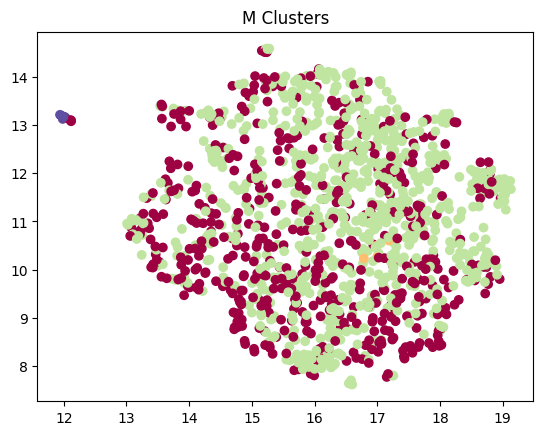

In [44]:
import umap
import matplotlib.pyplot as plt

umap_embeddings = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine').fit_transform(embeddings_M)

plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=labels_m, cmap='Spectral')
plt.title("M Clusters")
plt.show()


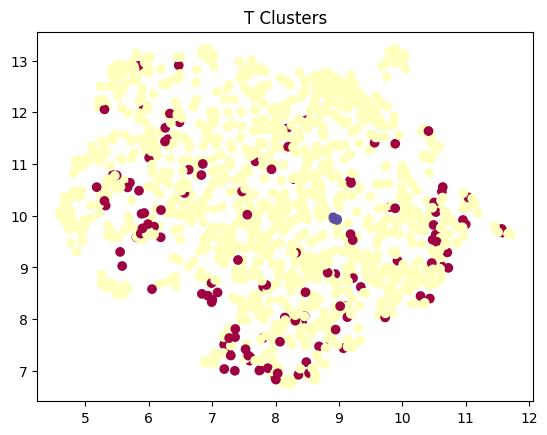

In [45]:
umap_embeddings = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine').fit_transform(embeddings_T)

plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=labels_t, cmap='Spectral')
plt.title("T Clusters")
plt.show()